In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use(['science','nature','notebook'])
#%matplotlib inline 

In [3]:
df = pd.read_csv(r"C:\Users\KuChris\Desktop\plot\20220114\21120931_AEDFA-PM-NS_PER2.xls.txt", delimiter="\,",engine='python')

In [4]:
# df.columns.values[0] = 't'
# df.columns.values[1] = '1'
# df.columns.values[2] = '2'

In [5]:
df

,Time,1,2
0,0.000000,-0.947766,18.767427
1,0.000417,-0.964559,18.768697
2,0.000833,-0.945428,18.767427
3,0.001250,-0.941923,18.766474
4,0.001667,-0.959475,18.767109
...,...,...,...
37271,15.529583,-5.719510,18.825769
37272,15.530000,-5.708286,18.827022
37273,15.530417,-5.709921,18.824516
37274,15.530833,-5.712725,18.828900


In [6]:
t = df['Time']
a = df['1']
b = df['2']

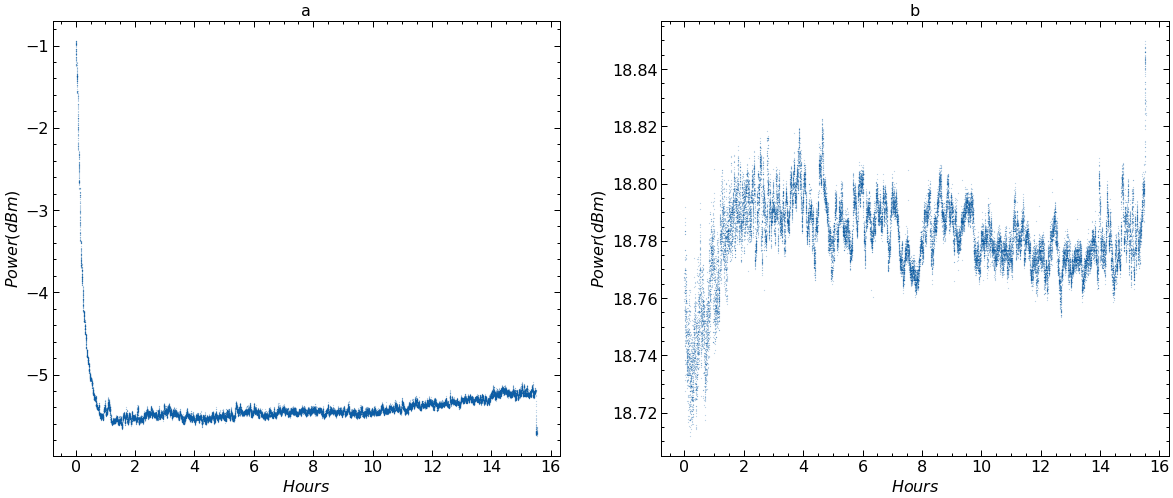

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(t,a, s=0.01)
plt.title("a")
plt.xlabel(r'$Hours$')
plt.ylabel(r'$Power(dBm)$')

plt.subplot(122)
plt.scatter(t,b, s=0.01)
plt.title("b")
plt.xlabel(r'$Hours$')
plt.ylabel(r'$Power(dBm)$')

plt.show()

In [8]:
from numpy import gradient

In [9]:
da = gradient(a,t)
db = gradient(b,t)

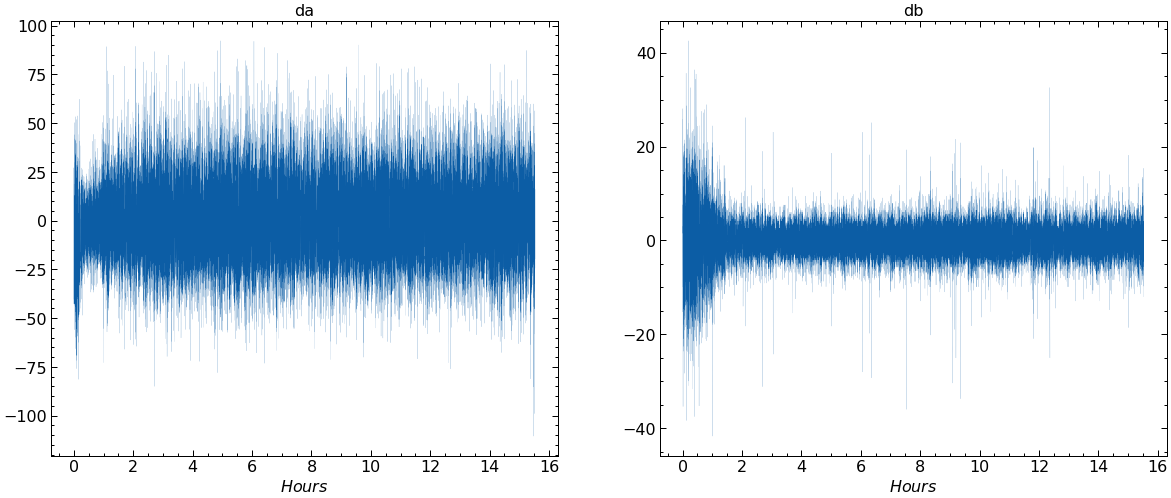

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(t,da,linewidth=0.1)
plt.title("da")
plt.xlabel(r'$Hours$')
#plt.ylabel(r'$Power(dBm)$')

plt.subplot(122)
plt.plot(t,db,linewidth=0.1)
plt.title("db")
plt.xlabel(r'$Hours$')
#plt.ylabel(r'$Power(dBm)$')
plt.show()

In [11]:
PC = 10* np.log10(a)

C:\Users\KuChris\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


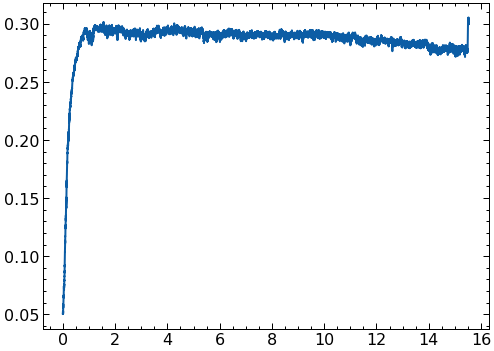

In [12]:

plt.plot(t,-a/b)

In [13]:
#dBm -> mW to the conversion
amw = 10**(a/10)
bmw = 10**(b/10)


0.2922876847558595 75.53326152930168


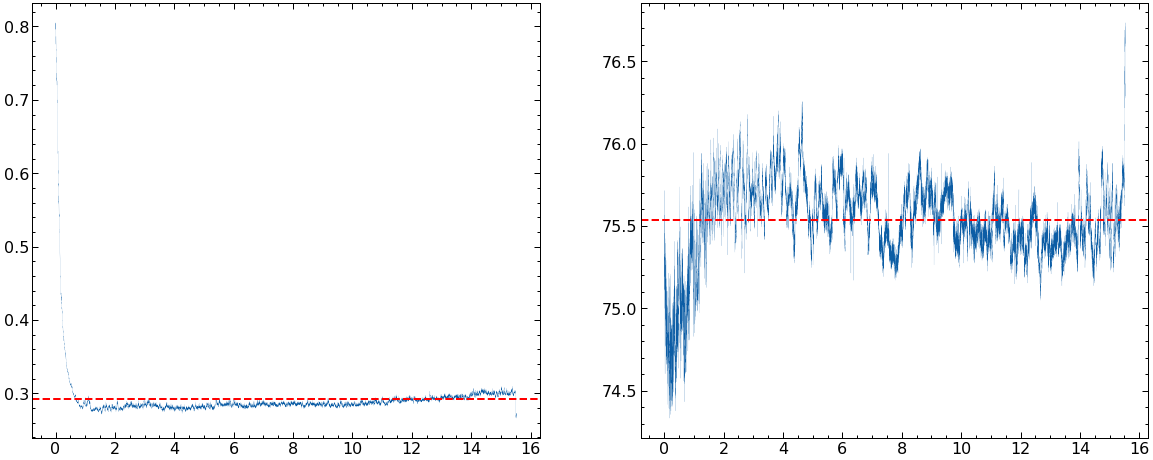

In [14]:
avga = np.average(amw)
avgb = np.average(bmw)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(t,amw,linewidth=0.1)
plt.axhline(avga,c='r',ls='--')

plt.subplot(122)
plt.plot(t,bmw,linewidth=0.1)
plt.axhline(avgb,c='r',ls='--')
print(avga,avgb)


-0.034631312887445094 0.06130497103856845


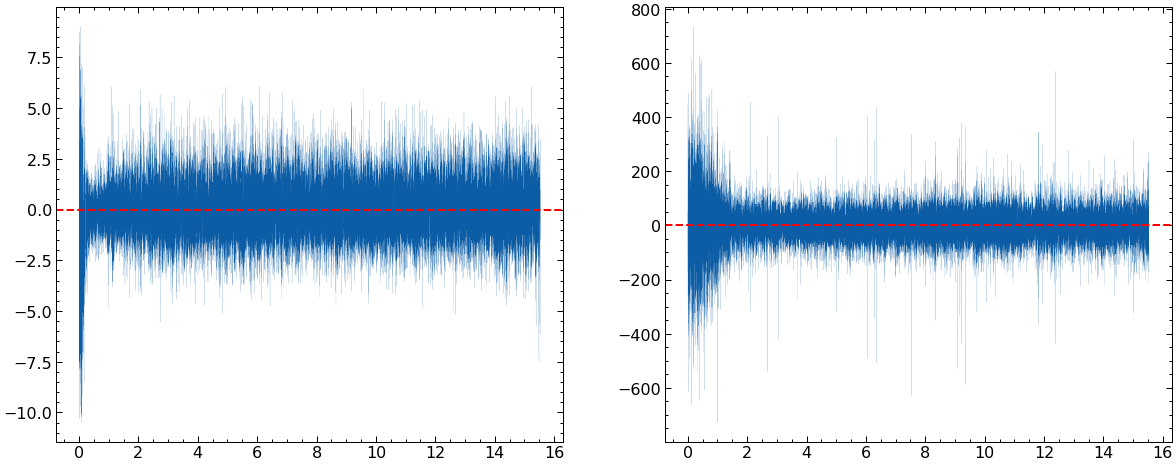

In [15]:
damw = gradient(amw,t)
dbmw = gradient(bmw,t)

avgda = np.average(damw)
avgdb = np.average(dbmw)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(t,damw,linewidth=0.1)
plt.axhline(avgda,c='r',ls='--')

plt.subplot(122)
plt.plot(t,dbmw,linewidth=0.1)
plt.axhline(avgdb,c='r',ls='--')

print(avgda,avgdb)

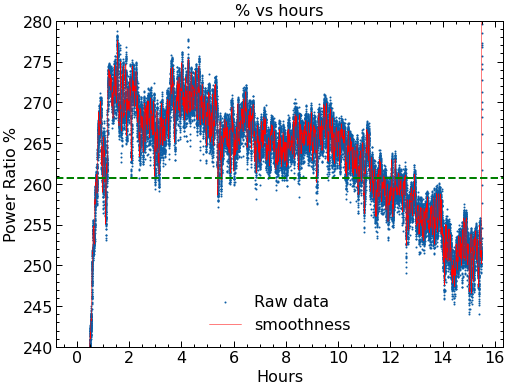

In [16]:
#%matplotlib qt
#%matplotlib notebook 
from scipy.signal import savgol_filter
rp= (bmw/amw).astype(np.float64)
#flat=max(rp)-min(rp)
smoothness = savgol_filter(rp, 51, 3)

avgpr = np.average(rp)


plt.figure()
#plt.ylim(0.0034,0.0042)
plt.ylim(240,280)
plt.scatter(t, rp, s=1 , label='Raw data')
plt.plot(t, smoothness, 'r', linewidth=0.5, label='smoothness')
plt.title("% vs hours")
plt.xlabel(r'Hours')
plt.ylabel(r'Power Ratio %')
plt.axhline(avgpr,c='g',ls='--')
plt.legend()

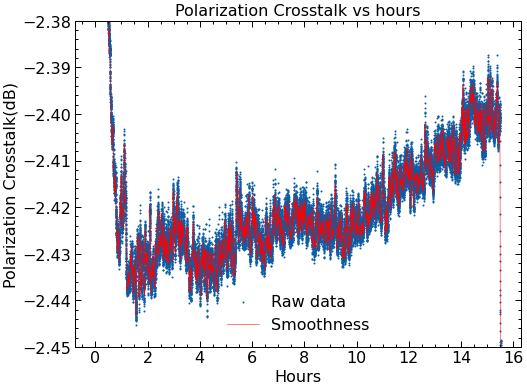

In [22]:
from scipy.signal import savgol_filter
rp1= np.log10(amw/bmw).astype(np.float64)
#flat=max(rp)-min(rp)
smoothness1 = savgol_filter(rp1, 51, 3)

avgpr1 = np.average(rp1)


plt.figure()
#plt.ylim(0.0034,0.0042)
plt.ylim(-2.45,-2.38)
plt.scatter(t, rp1, s=1 , label='Raw data')
plt.plot(t, smoothness1, 'r', linewidth=0.5, label='Smoothness')
plt.title("Polarization Crosstalk vs hours")
plt.xlabel(r'Hours')
plt.ylabel(r'Polarization Crosstalk(dB)')
#plt.axhline(avgpr,c='g',ls='--')
plt.legend()
#plt.savefig('Polarization Crosstalk.png')